# Маркетинговое исследование приложения Procrastinate Pro+

В качестве входных данных для исследования поступили данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года развлекательным приложением **Procrastinate Pro+**.

В нашем распоряжении три таблицы:
- лог сервера с данными о посещениях приложения пользователями,
- выгрузка их покупок за этот период,
- рекламные расходы.

Известно, что несмотря на большие вложения в рекламу, последние несколько месяцев компания терпит убытки. 

**Цель исследования**: выявить причины, по которым реклама не окупается; предложить пути решения проблемы.

**План исследования:**
 1. Обзор данных и предобработка данных.
 2. Определение функций для расчёта и анализа LTV, ROI, удержания и конверсии
 3. Исследовательский анализ данных
 4. Маркетинговое исследование
 5. Оценка окупаемости рекламы
 6. Итоговый вывод

### 1. Обзор предобработка данных

In [1]:
# импортируем библиотеки необходимые для начала анализа

import pandas as pd # импортируем библиотеку pandas для работы с таблицами

import numpy as np # импортируем библиотеку numpy для работы с массивами

from datetime import datetime, timedelta # импортируем библиотеку datetime для работы с данными 
#в формате даты и времени

from matplotlib import pyplot as plt # импортируем библиотеку pyplot для работы с графиками

import seaborn as sns # импортируем библиотеку seaborn для работы с инструментами визуализации

In [2]:
visits = pd.read_csv('visits_info_short.csv')
orders = pd.read_csv('orders_info_short.csv')
costs = pd.read_csv('costs_info_short.csv') # считываем исходные файлы

In [3]:
# поочередно ознакомимся с данными каждого из исходных датафреймов

visits.head() # считаем первые пять строк таблицы с данными о пользователях

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
orders.head() # считаем первые пять строк таблицы с данными о заказах

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [5]:
costs.head() # считаем первые пять строк таблицы с данными о расходах на рекламу

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [6]:
# определим функцию для приведения столбцов исходных датафреймов к хорошему стилю

def good_style(df):
    # приводим названия столбцов к нижнему регистру, заменяем пробелы на знак "_"
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    return df

In [7]:
# приведем наименования столбцов датафреймов к хорошему стилю, выведем первые 5 строк получившихся таблиц

good_style(visits)
display(visits.head())

good_style(orders)
display(orders.head())

good_style(costs)
display(costs.head())

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [8]:
# выведем основные параметры таблиц с исходными данными

display(visits.info())

display(orders.info())

costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [9]:
# изменим типы данных в столбцах с датами 

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt'])

In [10]:
# повторим вызов функции info, чтобы проверить себя

display(visits.info())

display(orders.info())

costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


In [11]:
# проверим датафреймы поочередно на наличие пропусков

visits.isna().sum() # проверяем на наличие пропусков таблицу с данными о пользователях

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

In [12]:
orders.isna().sum() # проверяем на наличие пропусков таблицу с данными о заказах

user_id     0
event_dt    0
revenue     0
dtype: int64

In [13]:
costs.isna().sum() # проверяем на наличие пропусков таблицу с данными о затратах на рекламу

dt         0
channel    0
costs      0
dtype: int64

In [14]:
# проверим наличие явных дубликатов в таблицах

display(visits.duplicated().sum())
display(orders.duplicated().sum())
costs.duplicated().sum()

0

0

0

In [15]:
# дополнительно проверим:

# наличие дубликатов в visits, сравнивая значения в строках по столбцам с id и датой начала сессии
visits[['user_id', 'session_start']].duplicated().sum() 

0

In [16]:
# наличие дубликатов в orders, сравнивая значения в строках по столбцам с id и датой заказа
orders[['user_id', 'event_dt']].duplicated().sum() 

0

In [17]:
# наличие дубликатов в costs, сравнивая значения в строках по столбцам с датой и идентификатором 
# рекламного источника
costs[['dt', 'channel']].duplicated().sum() 

0

**Вывод:**

При знакомстве с данными было выявлено, что:
- оформление исходных таблиц не соответсвует правилам хорошего стиля;
- столбцы с информацией о времени содержат данные в неподходящем для дальнейшей работы формате *object*.

Пропусков и дубликатов в исходных датафреймах обнаружено не было. 

Таким образом, в ходе предобработки данных перед исследованием, были произведены следующие преобразования:
- наименования столбцов в исходных датафреймах приведены к правилам хорошего стиля;
- столбцы с информацией о времени были приведены к формату *datetime* удобному для дальнейшего использования.

### 2. Определение функций для расчёта и анализа LTV, ROI, удержания и конверсии.

In [18]:
# зададим функцию для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = pd.to_datetime(profiles['first_ts']).dt.floor('D')
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [19]:
# определим функцию для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [20]:
# зададим функцию для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [21]:
# зададим функцию для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [22]:
# определим функцию для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [23]:
# определим функцию для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [24]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [25]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

**Вывод:**

На данном шаге были определены функции для расчета и визуализации основных показателей, используемых в маркетинговом анализе.

### 3. Исследовательский анализ данных

#### 3.1 Составляем профили пользователей

In [26]:
# составим профили пользователей приложения, используя функцию get_profiles

users = get_profiles(visits, orders, costs)
users.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [27]:
# определим минимальную и максимальную даты привлечения пользователей

min_date = users['dt'].min()
display(min_date)

max_date = users['dt'].max()
max_date

Timestamp('2019-05-01 00:00:00')

Timestamp('2019-10-27 00:00:00')

Итак, у нас имеется информация о привлечении новых пользователей приложения за период с 1 мая по 27 октября 2019 года.

#### 3.2 Считаем общее количество пользователей и доли платящих пользователей для разных стран, каналов привлечения и типов устройства

In [28]:
# определим функцию, которая построит таблицы, отражающие общее количество пользователей и 
# доли платящих пользователей, в зависимости от разных факторов: страны, типа устройства пользователя и 
# рекламного источника

def number_of_users(df, colname):
    # построим таблицу, отражающую общее количество пользователей и количество платящих пользователей
    # в зависимости от фактора
    users_per_factor = (
    df.groupby(colname).agg({'user_id':'nunique', 'payer':'sum'})
    .rename(columns={'user_id':'n_users', 'payer':'n_payer'})
    )
    
    # расчитаем долю платящих пользователей для каждого фактора и добавим столбец с этим показателем
    # в таблицу users_per_factor
    users_per_factor['payer_rate'] = users_per_factor['n_payer']/users_per_factor['n_users']
    
    # оставим в итоговой таблице users_per_factor только количество пользователей и долю платящих,
    # отстортируем таблицу по убыванию этой доли
    users_per_factor = users_per_factor[['n_users', 'payer_rate']].sort_values(by='n_users', ascending=False)
    
    return users_per_factor

In [29]:
# построим таблицу, отражающую общее количество пользователей и количество платящих пользователей 
# для каждого региона пользования

users_per_device = number_of_users(users, 'region')
users_per_device

,n_users,payer_rate
region,,
United States,100002,0.069019
UK,17575,0.039829
France,17450,0.037994
Germany,14981,0.041119


Наибольшее количество пользователей, с большим отрывом, наблюдается в США - 100 тысяч человек. Лидером по доле платящих пользователей также является США - 7% от общего количества. Меньше всего приложение пользуется популярностью в Германии. При этом доля платящих пользователей там достаточно высока - 4 %. Примерно одинаковое количество пользователей и доли покупателей наблюдаются в Великобритании и Франции - 17,5 тысяч и ~4% соответственно. 

In [30]:
# построим таблицу, отражающую общее количество пользователей и количество платящих пользователей 
# для каждого устройства

users_per_device = number_of_users(users, 'device')
users_per_device

,n_users,payer_rate
device,,
iPhone,54479,0.062079
Android,35032,0.058518
PC,30455,0.050468
Mac,30042,0.063644


Самым популярным девайсом для пользования приложением является IPhone - 54,5 тысячи пользователей выбирают именно его. Аутсайдерами в данном рейтинге являются Mac и ПК - около 30 тысяч пользователей заходят в приложение с помощью этих устройств. Немного обгоняет их Android со своими 35 тысячами пользователей. Доли покупателей для разных типов устройств отличаются мало и варьируются от 5 до 6,5 %. 

In [31]:
# построим таблицу, отражающую общее количество пользователей и количество платящих пользователей 
# для каждого источника привлечения

users_per_channel = number_of_users(users, 'channel')
users_per_channel

,n_users,payer_rate
channel,,
organic,56439,0.020553
FaceBoom,29144,0.122049
TipTop,19561,0.096007
OppleCreativeMedia,8605,0.027077
LeapBob,8553,0.030633
WahooNetBanner,8553,0.052964
RocketSuperAds,4448,0.079137
MediaTornado,4364,0.035747
YRabbit,4312,0.038265


Несмотря на то, что реклама была закуплена у 10 разных площадок, чаще всего пользователи знакомятся с приложением самостоятельно - наибольшее число пользователей (56,5 тысяч человек) было привлечено органично. Однако этот вид привлечения не является результативным - доля платящих пользователей среди органично-привлеченных наиболее низкая, всего 2%.
Наиболее успешным каналом привлечения является FaceBoom. С помощью этого рекламного сервиса удалось привлечь 29 тысяч человек, 12% из которых стали покупателями. На втором месте идет сервис TipTop и его 19,5 тысяч пользователей. 

**Вывод:**

На данном шаге исследования были проанализированы профили пользователей, привлеченных в период с 1 мая по 27 октября 2019 года.

Было установлено, что большая часть пользователей сосредоточены в США. Там же проживает наибольшее количество платящих пользователей. Логично, что, при этом, наиболее популярным устройством для пользования приложением является IPhone. Большая часть пользователей начинают свое знакомство с Procrastinate Pro+ самостоятельно - более 56 тысяч человек было привлечено не через рекламу. Наиболее результативными рекламными сервисами являются FaceBoom и TipTop - они принесли приложению наибольшее колиичество пользователей и покупателей соответственно.

### 4. Маркетинговое исследование

In [32]:
# рассчитаем общую сумму расходов на маркетинг

total_costs = costs['costs'].sum()
total_costs.round()

105497.0

In [33]:
# рассчитаем сумму расходов на маркетинг в разрезе каналов привлечения

costs_per_channel = costs.groupby('channel')['costs'].sum().reset_index()
costs_per_channel.sort_values(by='costs', ascending=False).reset_index()

,index,channel,costs
0,6,TipTop,54751.30
1,1,FaceBoom,32445.60
2,7,WahooNetBanner,5151.00
3,0,AdNonSense,3911.25
4,4,OppleCreativeMedia,2151.25
5,5,RocketSuperAds,1833.00
6,2,LeapBob,1797.60
7,9,lambdaMediaAds,1557.60
8,3,MediaTornado,954.48
9,8,YRabbit,944.22


Больше половины от общей стоимости расходов на маркетинг были потрачены на рекламу на сервисе TipTop. На втором месте расположился сервис FaceBoom. Эти же источники привлекли приложению наибольшее число пользователей. Прочие сервисы обошлись значительно дешевле.

In [34]:
# изучим, как изменялись расходы во времени, для этого дополним таблицу с рекламными расходами

costs['week'] = costs['dt'].dt.isocalendar().week # добавим столбец с порядковым номером недели

costs['month'] = costs['dt'].dt.month # добавим столбец с порядковым номером месяца

costs.head()

,dt,channel,costs,week,month
0,2019-05-01,FaceBoom,113.3,18,5
1,2019-05-02,FaceBoom,78.1,18,5
2,2019-05-03,FaceBoom,85.8,18,5
3,2019-05-04,FaceBoom,136.4,18,5
4,2019-05-05,FaceBoom,122.1,18,5


In [35]:
# построим сводную таблицу с данными об изменении расходов на рекламу по неделям

weekly_costs = costs.pivot_table(values='costs', index='week', columns='channel', aggfunc='sum')
weekly_costs.head()

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
week,,,,,,,,,,
18,211.05,535.7,16.80,38.64,24.00,99.450,347.0,49.2,52.2,81.6
19,273.00,750.2,31.71,61.68,34.50,139.230,470.0,92.4,75.9,103.2
20,265.65,755.7,26.67,59.04,27.50,138.060,454.0,90.0,69.3,90.4
21,266.70,722.7,26.67,50.16,34.25,131.040,801.8,79.2,65.4,119.2
22,202.65,1208.9,65.52,36.96,81.75,97.695,1421.2,179.4,49.8,83.2


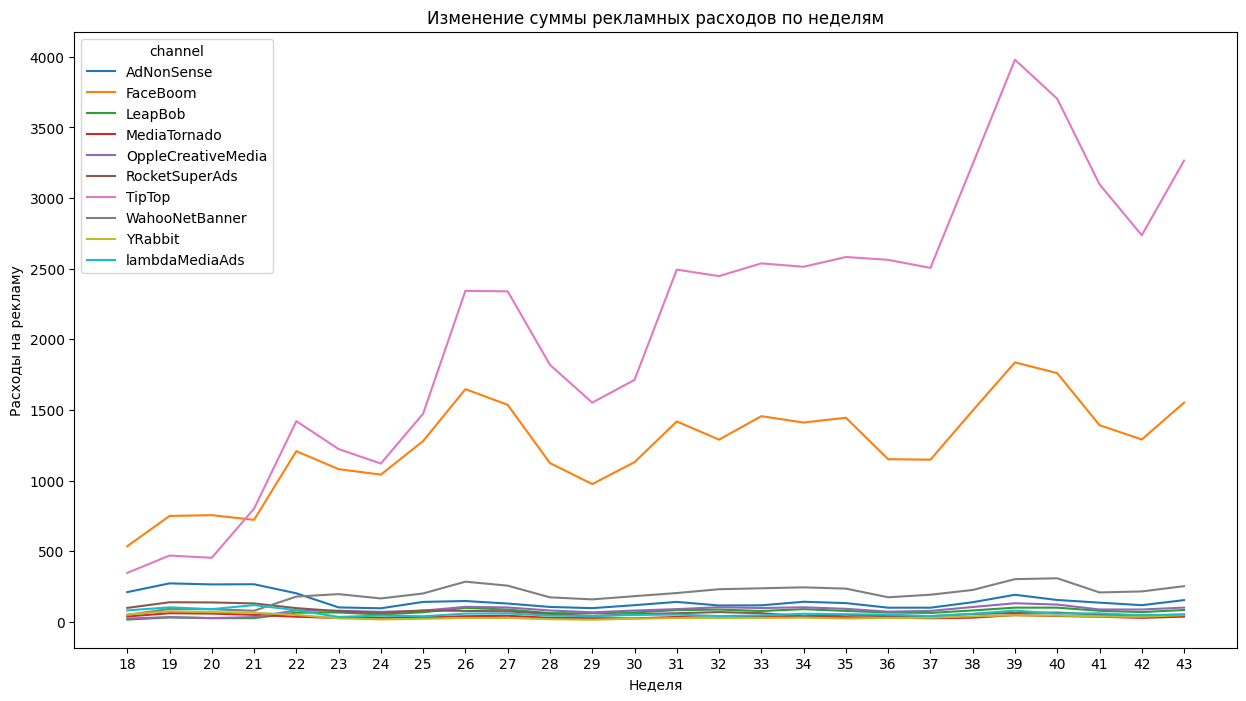

In [36]:
# построим график динамики расходов на рекламу по неделям
weekly_costs.plot(xticks=list(weekly_costs.index.values), figsize=(15,8))
plt.xlabel('Неделя')  
plt.ylabel('Расходы на рекламу')
plt.title('Изменение суммы рекламных расходов по неделям')  
plt.show()

Расходы на рекламу в источниках TipTop и FaceBoom росли от недели к неделе резкими скачками. Особенно интенсивно стоимость рекламы в этих источниках росла с 37 по 39 неделю. Начиная с 39 недели вливание в рекламу на этих сервисах стало снижаться, на 42 неделе затраты снова поползли вверх. Расходы на рекламу через другие каналы колебались меньше и стоили стабильно значительно меньше рекламы в TipTop и FaceBoom.

In [37]:
# построим сводную таблицу с данными об изменении расходов на рекламу по месяцам

monthly_costs = costs.pivot_table(values='costs', index='month', columns='channel', aggfunc='sum')
monthly_costs.head()

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
month,,,,,,,,,,
5,1169.70,3524.4,140.28,238.56,169.75,577.980,2981.0,418.8,299.70,458.4
6,538.65,5501.1,314.58,138.00,370.00,325.715,6675.6,921.0,106.20,199.2
7,504.00,5294.3,313.53,138.48,366.50,252.070,8410.2,851.4,97.38,219.2
8,579.60,6274.4,369.81,154.56,439.25,253.110,11202.0,1040.4,124.74,220.0
9,581.70,6114.9,343.98,144.72,427.75,218.400,13232.5,977.4,152.79,247.2


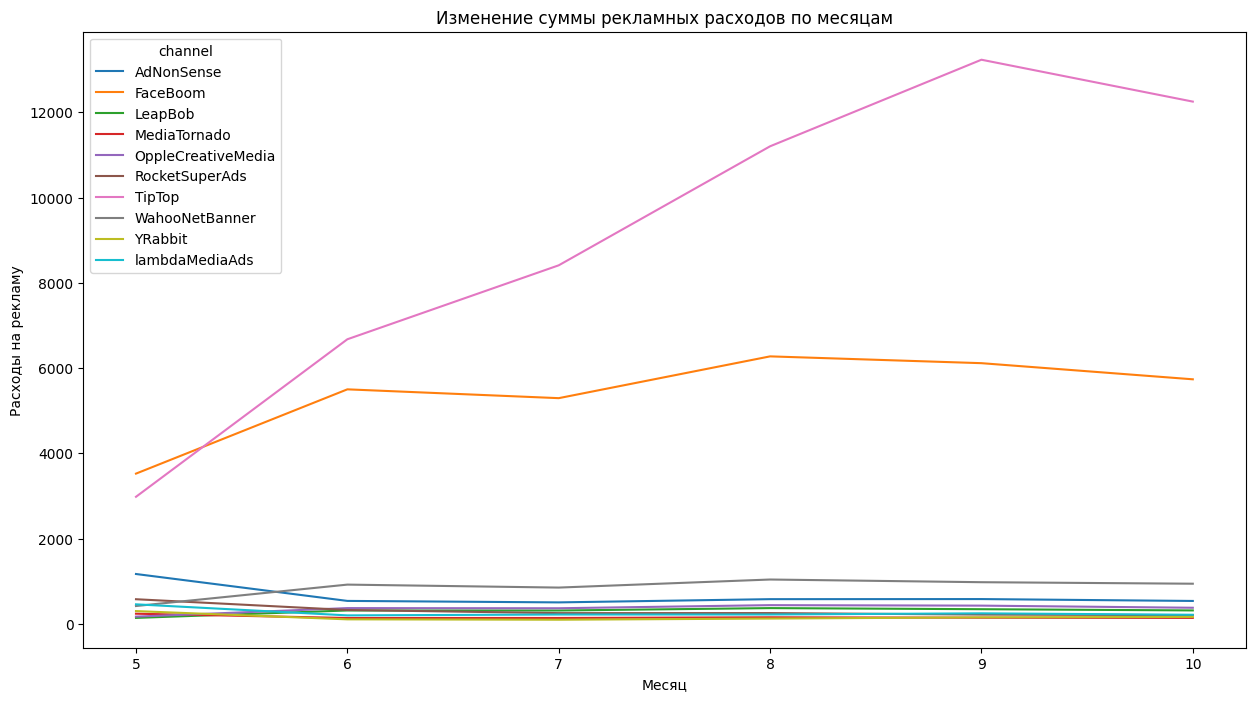

In [38]:
# построим график динамики расходов на рекламу по месяцам

monthly_costs.plot(figsize=(15,8))
plt.xlabel('Месяц')
plt.ylabel('Расходы на рекламу')
plt.title('Изменение суммы рекламных расходов по месяцам')
plt.show()

При изучении динамики расходов на рекламу по месяцам, резкий рост расходов на рекламу в источнике TipTop еще заметнее. С мая по октябрь затраты на покупку рекламы на этом сервисе увеличились в несколько раз. Помесячное изменение расходов на рекламу в FaceBoom выглядит более стабильным - стоимость рекламы в этом канале на протяжение всего периода колеблется от 4000 до 6000. По прочим источникам графики динамики практически сливаются в прямые линии - расходы на рекламу в них стабильно низкие.

In [39]:
# рассчитаем стоимость привлечения одного пользователя (CAC) из каждого источника

# соберем в одной таблице общие расходы на рекламу в каждом источнике и общие количество пользователей,
# привлеченных через этот источник
CAC_per_channel = users.groupby('channel').agg({'acquisition_cost':'sum', 'user_id':'nunique'})

# разделим затраты на рекламу через источник на общее количество пользователей, привлеченных через источник
CAC_per_channel = CAC_per_channel.div(CAC_per_channel['user_id'], axis=0)['acquisition_cost']

# выведем получившийся результат, округлив его до 2ух знаков после запятой и отсортировав значения по убыванию
CAC_per_channel.round(2).sort_values(ascending=False)

channel
TipTop                2.80
FaceBoom              1.11
AdNonSense            1.01
lambdaMediaAds        0.72
WahooNetBanner        0.60
RocketSuperAds        0.41
OppleCreativeMedia    0.25
MediaTornado          0.22
YRabbit               0.22
LeapBob               0.21
organic               0.00
Name: acquisition_cost, dtype: float64

Стоимость привлечения одного пользователя дороже всего обошлась в сервисе TipTop. В 2,5 раза дешевле стоил пользователь, привлеченный через FaceBoom. Практически на том же уровне находится стоимость привлечения через сервис AdNonSense.

**Вывод:**

Общая сумма расходов на маркетинг составляет 105 497. Больше половины от этой суммы уходит на оплату рекламы в источнике TipTop. Еще около 30% всех затрат на маркетинг приходится на рекламу в сервисе FaceBoom. При этом расходы на рекламу в этих источниках интенсивно росли на протяжении всего исследуемого периода. Особенно отличился сервис TipTop: с мая по октябрь общая стоимость услуг сервиса выросла с 3000 до 12000. Стоимость привлечения одного пользователя также наиболее высокая у TipTop. На втором месте по САС идет сервис FaceBoom.

### 5. Оценка окупаемости рекламы

In [40]:
# установим момент и горизонт анализа данных

observation_date = datetime(2019, 11, 1).date() 
horizon_days = 14

#### 5.1 Общая оценка окупаемости рекламы

In [41]:
# считаем LTV и ROI 
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    users[users['channel']!='organic'], orders, observation_date, horizon_days)

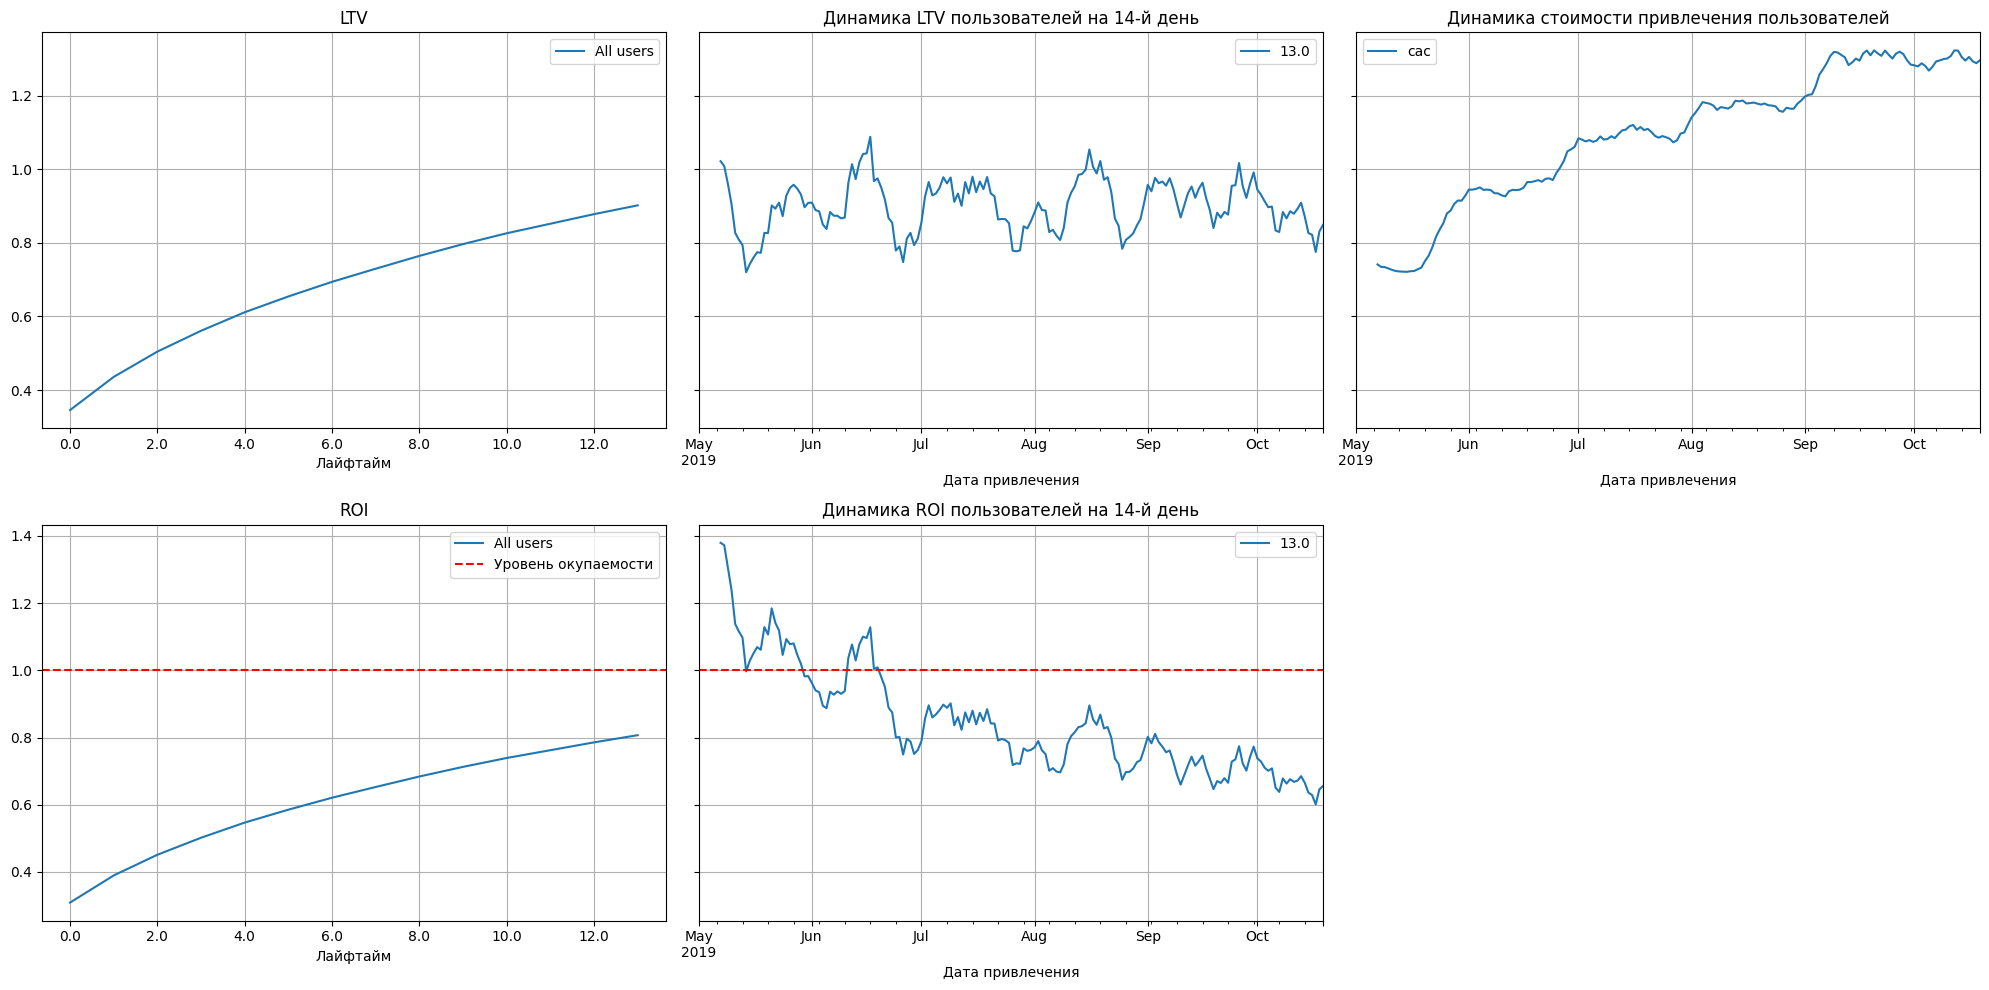

In [42]:
# построим графики LTV и ROI, а также их динамики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

LTV 14-ого дня стабильно держится в промежутке от 0,8 до 1,0 на протяжении всего исследуемого периода. С другой стороны САС рос на протяжении всего периода с 0,7 в мае до 1,3 в октябре. В следствие этого ROI падал на протяжении всего исследуемого периода и, начиная с конца июня был стабильно меньше 1. Соотствественно, реклама на протяжении всего горизонта анализа не окупалась.

#### 5.2 Расчет конверсии пользователей

In [43]:
# посчитаем конверсию пользователей и динамику её изменения, исключив органических пользователей из анализа
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    users[users['channel']!='organic'], orders, observation_date, horizon_days
)

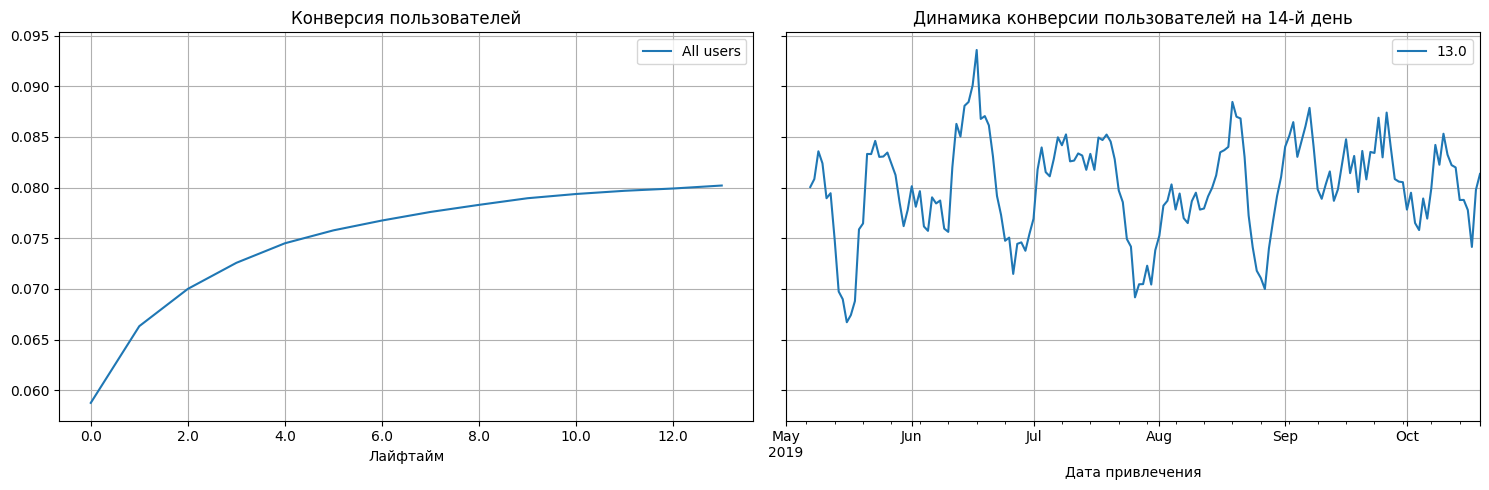

In [44]:
# построим графики конверсии пользователей и ее изменения
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Кривая конверсии из пользователей в покупатели стабильно растет. 

Конверсия пользователей на 14-ый день изменялась во времени. Наивысшей отметки (0,94) конверсия достигла в середине июня. В середине мая наблюдалось значительное падения данного показателя до 0,64. Все остальное время конверсия 14-ого дня находилась в промежутке от 0,7 до 0,85.

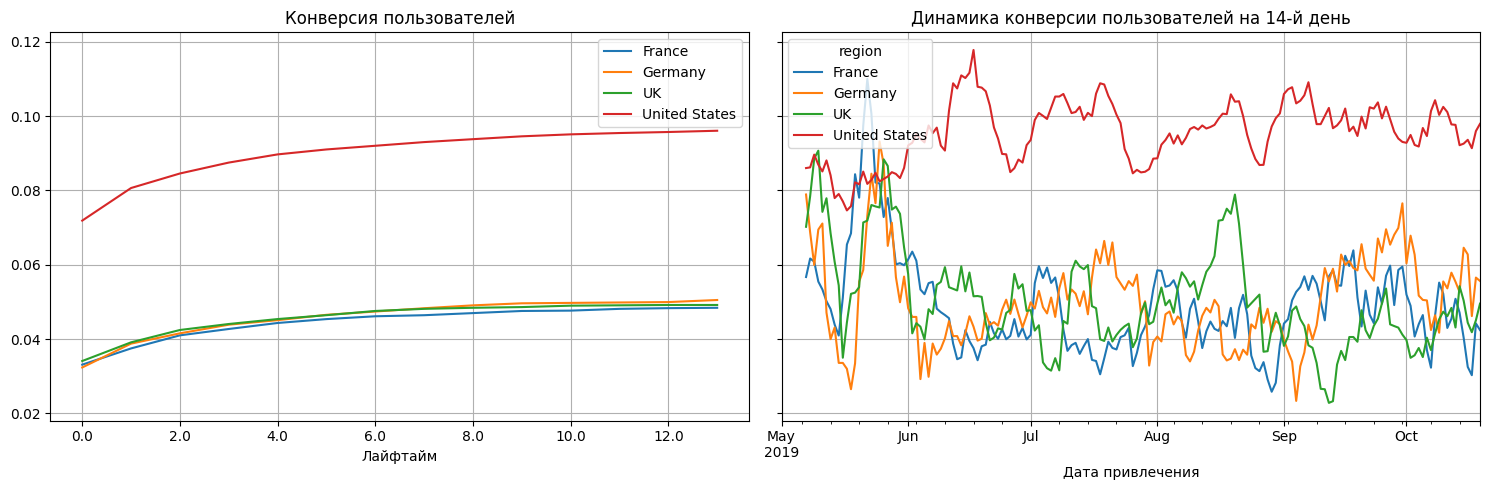

In [45]:
# посчитаем конверсию пользователей и динамику её изменения для разных стран 
# и построим графики конверсии пользователей и ее изменения
    
conversion_raw, conversion_grouped, conversion_history = get_conversion(
        users[users['channel']!='organic'], orders, observation_date, horizon_days, dimensions = ['region'])
   

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Лучше всего конвертируются в покупателей пользователи из USA. Для пользователей из других стран конверсия ниже и примерно на одном уровне. Анализ динамики конверсии пользователей на 14-й день также показал, что конверсия пользователей из США была стабильно выше конверсии пользователей из других стран на протяжении всего исследуемого периода. Пик конвертации пользователей в покупатели для США наблюдается в середине июня. Для других стран пиковым месяцем был май. Все остальное время их конверсия колебалась между 0,03 и 0,07.

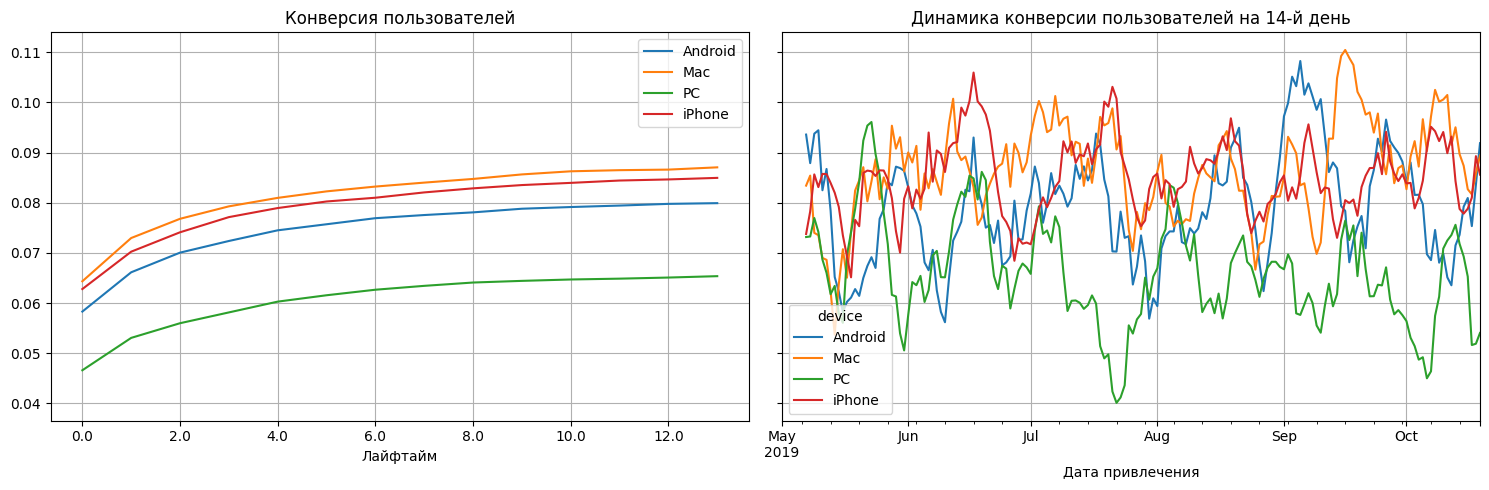

In [46]:
# посчитаем конверсию пользователей и динамику её изменения для разных устройств 
# и построим графики конверсии пользователей и ее изменения

conversion_raw, conversion_grouped, conversion_history = get_conversion(
        users[users['channel']!='organic'], orders, observation_date, horizon_days, dimensions=['device'])

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Наиболее высокая конверсия наблюдается у пользователей Mac и IPhone - в среднем она составляет 8%. Средняя конверсия пользователей PC и  Android немного ниже. Конверсия пользователей всех видов устройств на 14-й день сильно колебалась на протяжении всего периода. 

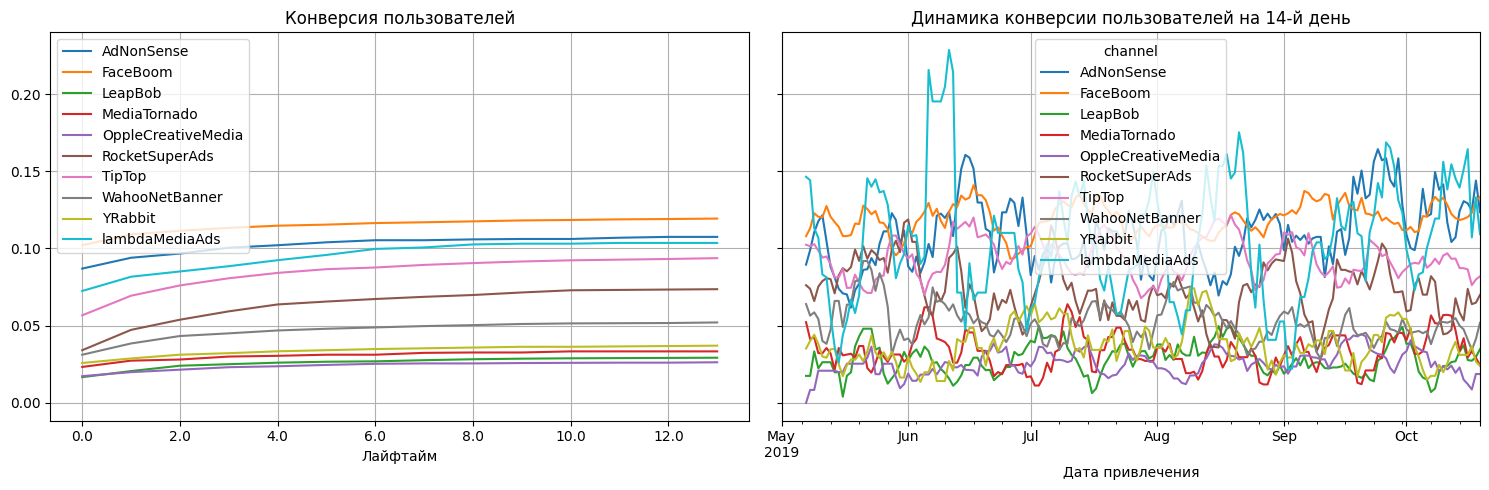

In [47]:
# посчитаем конверсию пользователей и динамику её изменения для разных каналов привлечения 
# и построим графики конверсии пользователей и ее изменения

conversion_raw, conversion_grouped, conversion_history = get_conversion(
        users[users['channel']!='organic'], orders, observation_date, horizon_days, dimensions=['channel'])
    
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Наивысший уровень конверсии наблюдается у канала FaceBoom и составляет 12%. Немного отстают AdNonSense и lambdaMediaAds, для них этот показатель составлет 10%. Далее идет TipTop. Конверсия пользователей на 14-й день, привлеченных через разные платформы, сильно менялась во времени. Наблюдается резкий скачок конверсии у пользователей, пришедших через lambdaMediaAds в начале июня. Стабильно высокую конверсию 14ого дня показывает канал FaceBoom.

#### 5.3 Расчет удержания пользователей

In [48]:
# посчитаем удержание пользователей

retention_raw, retention_grouped, retention_history = get_retention(
    users, visits, observation_date, horizon_days
)

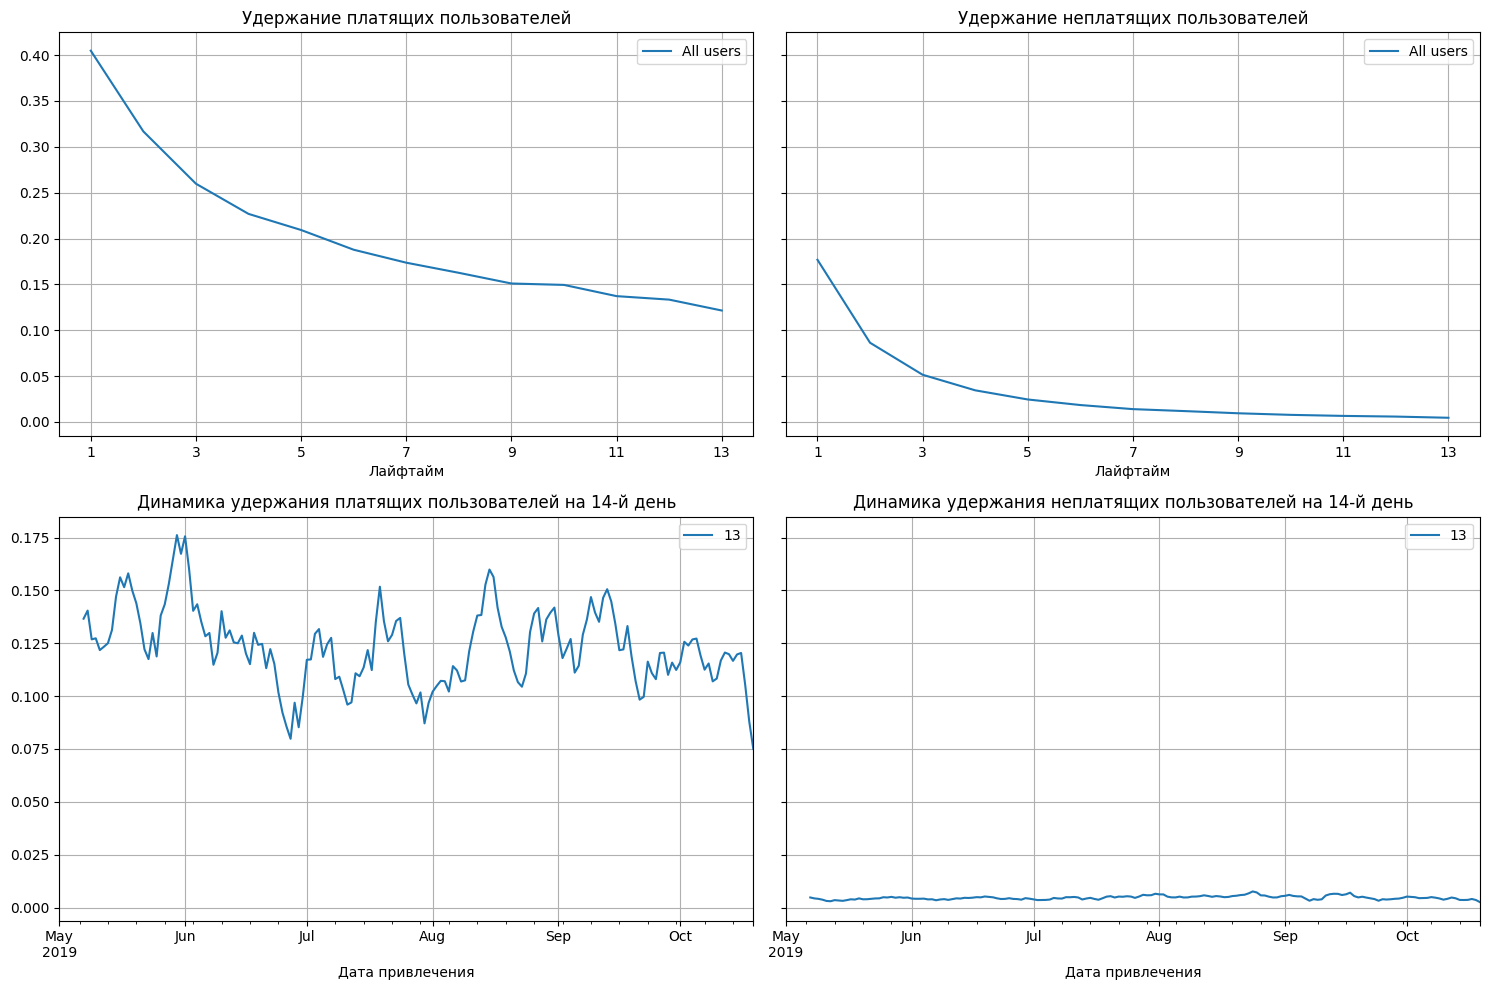

In [49]:
# построим графики удержания пользователей и его изменения во времени

plot_retention(retention_grouped, retention_history, horizon_days) 

Платящие пользователи стабильно лучше удерживались, чем неплатящие. При этом динамика удержания и той, и другой группы пользователей на 14-й день жизни была стабильна на протяжении всего исследуемого периода. Для платящих пользователей удержание колебалось вокруг значения 0,125, для неплатящих - вокруг 0,01.

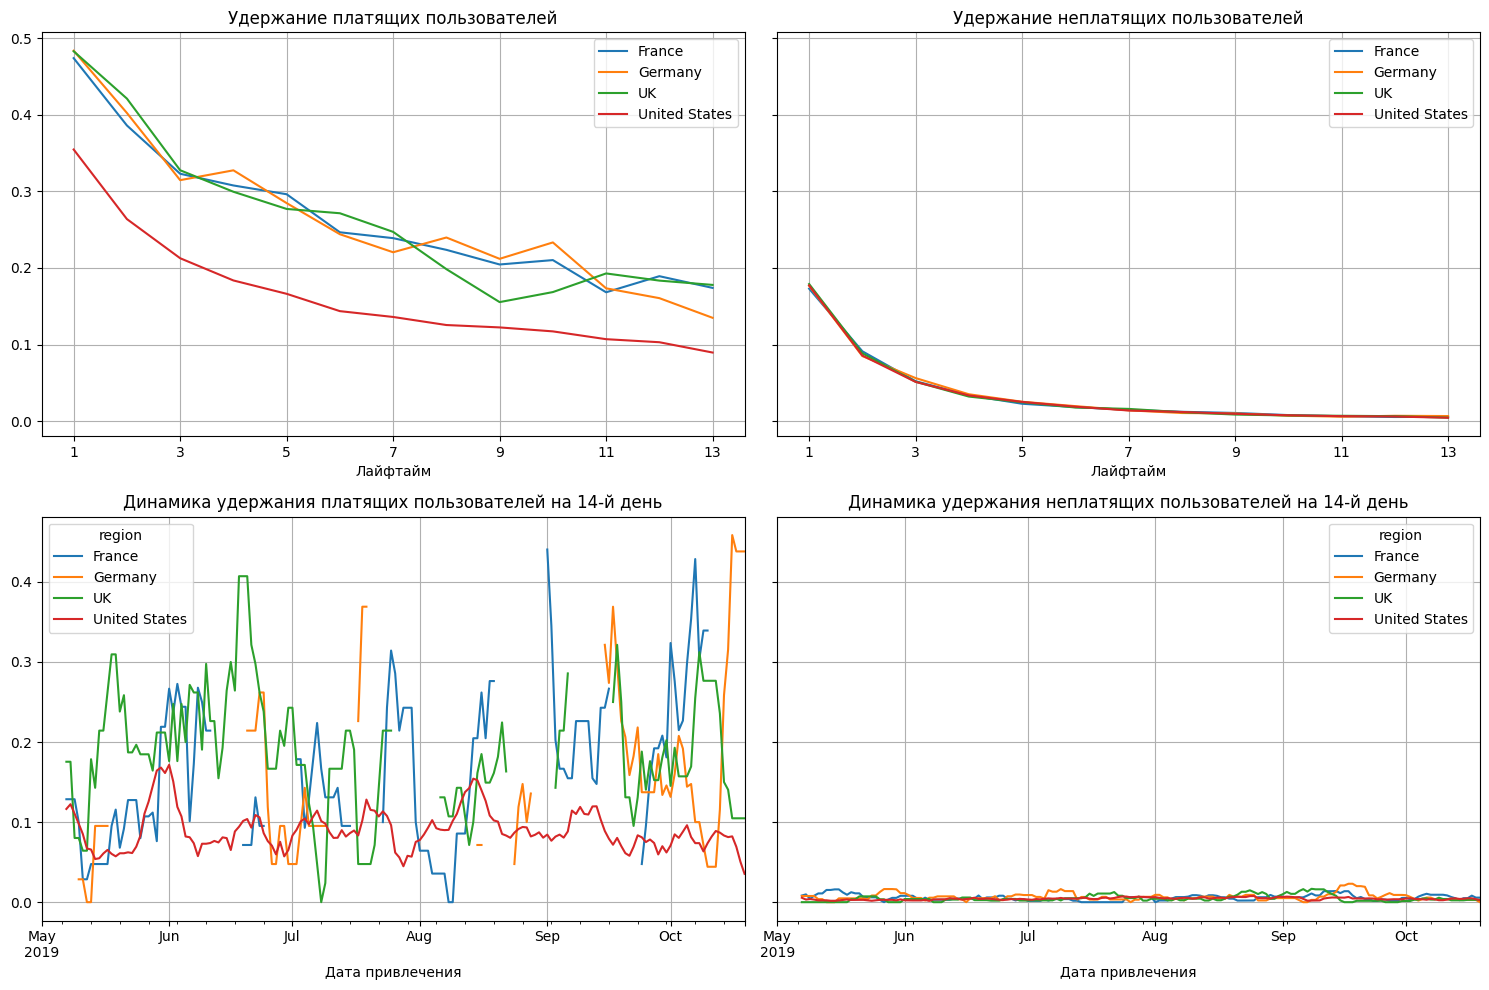

In [50]:
# посчитаем удержание для пользователей из разных стран и
# построим графики удержания пользователей и его изменения во времени

retention_raw, retention_grouped, retention_history = get_retention(
        users[users['channel']!='organic'], visits, observation_date, horizon_days, dimensions=['region'])

plot_retention(retention_grouped, retention_history, horizon_days) 

В среднем платящие пользователи из США удерживались хуже других на протяжении всех лайфтаймов. При этом, удержание 14-ого дня для платящих пользователей из США было стабильно низким и практически все время находилось в диапазоне от 0,05 до 0,1 без резких всплесков. Во всех остальных странах удержание платящих пользователей на 14-й день значительно варьируется на протяжении всего периода. А в среднем удерживается приблизительно на одном уровне: 0,18 на конец первых двух недель для Франции и Великобритании и 0,15 в это же время - для Германии.

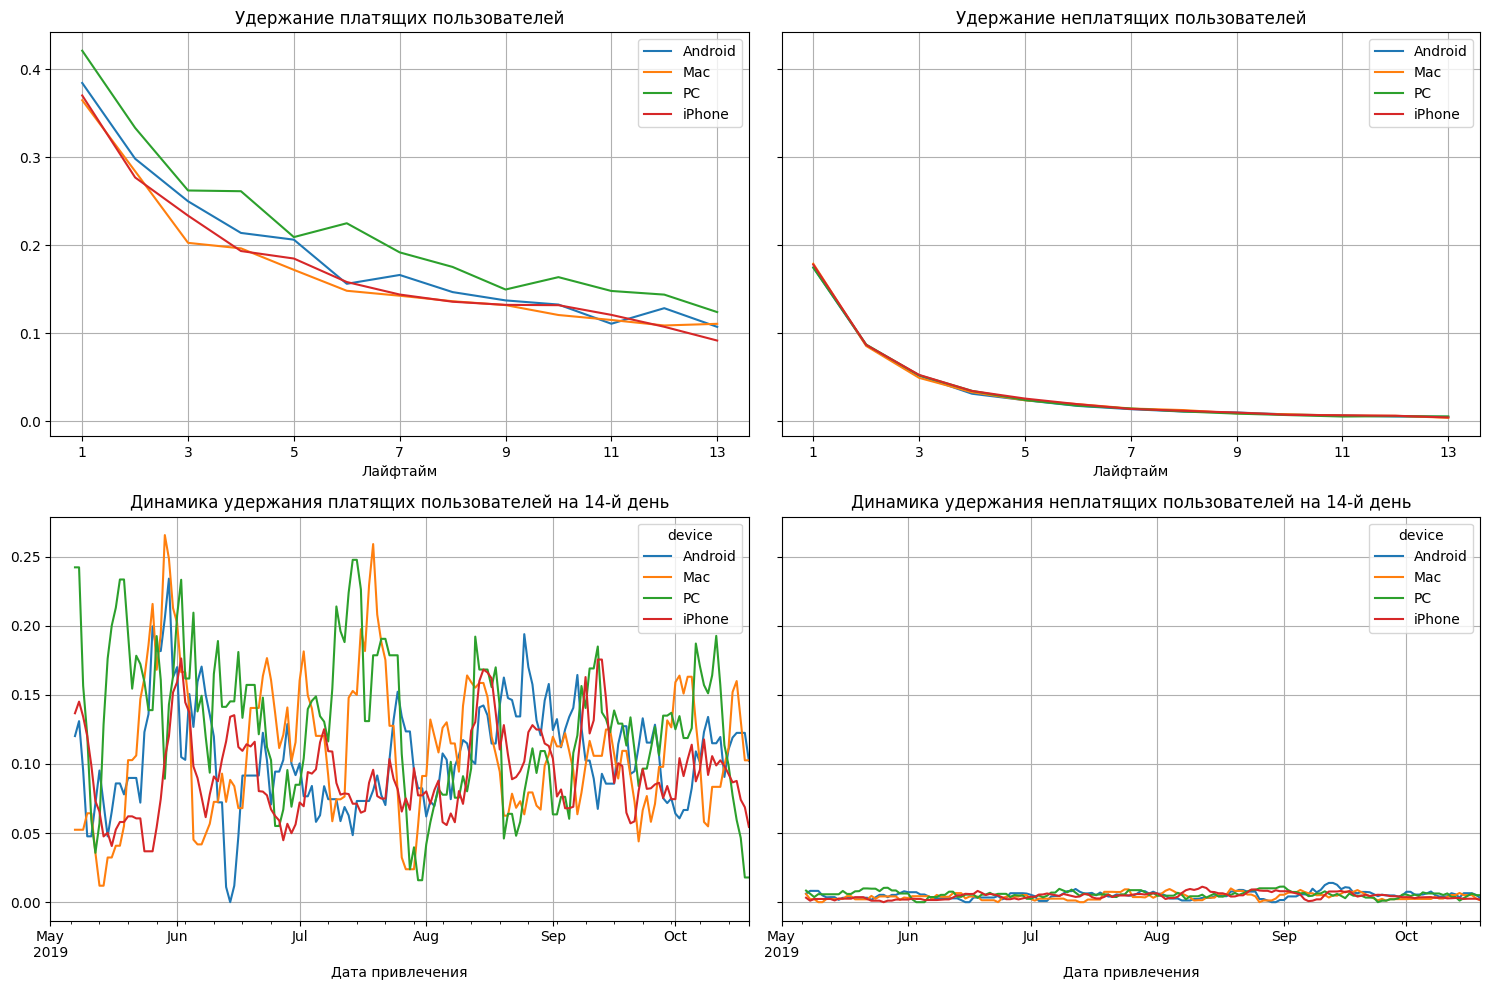

In [51]:
# посчитаем удержание для пользователей, использующих разные устройства
# и построим графики удержания пользователей и его изменения во времени

retention_raw, retention_grouped, retention_history = get_retention(
        users[users['channel']!='organic'], visits, observation_date, horizon_days, dimensions=['device'])

plot_retention(retention_grouped, retention_history, horizon_days) 

Динамика удержания платящих пользователей разных устройств на 14-й день сильно отличалась. Для пользователей Mac наибольшее удержание платящих пользователей наблюдалось в конце мая и в середине июля, для IPhone - в начале июня и в середине августа и сентября, для РС - в середине мая и в середине июля, для Android - в конце мая. Наивысшее удержание достигается у пользователей Mac в конце мая и середине июля и достигает 0,25. Периоды спада также различны для удержания пользователей разных платформ и в основном приходятся на летние месяцы.

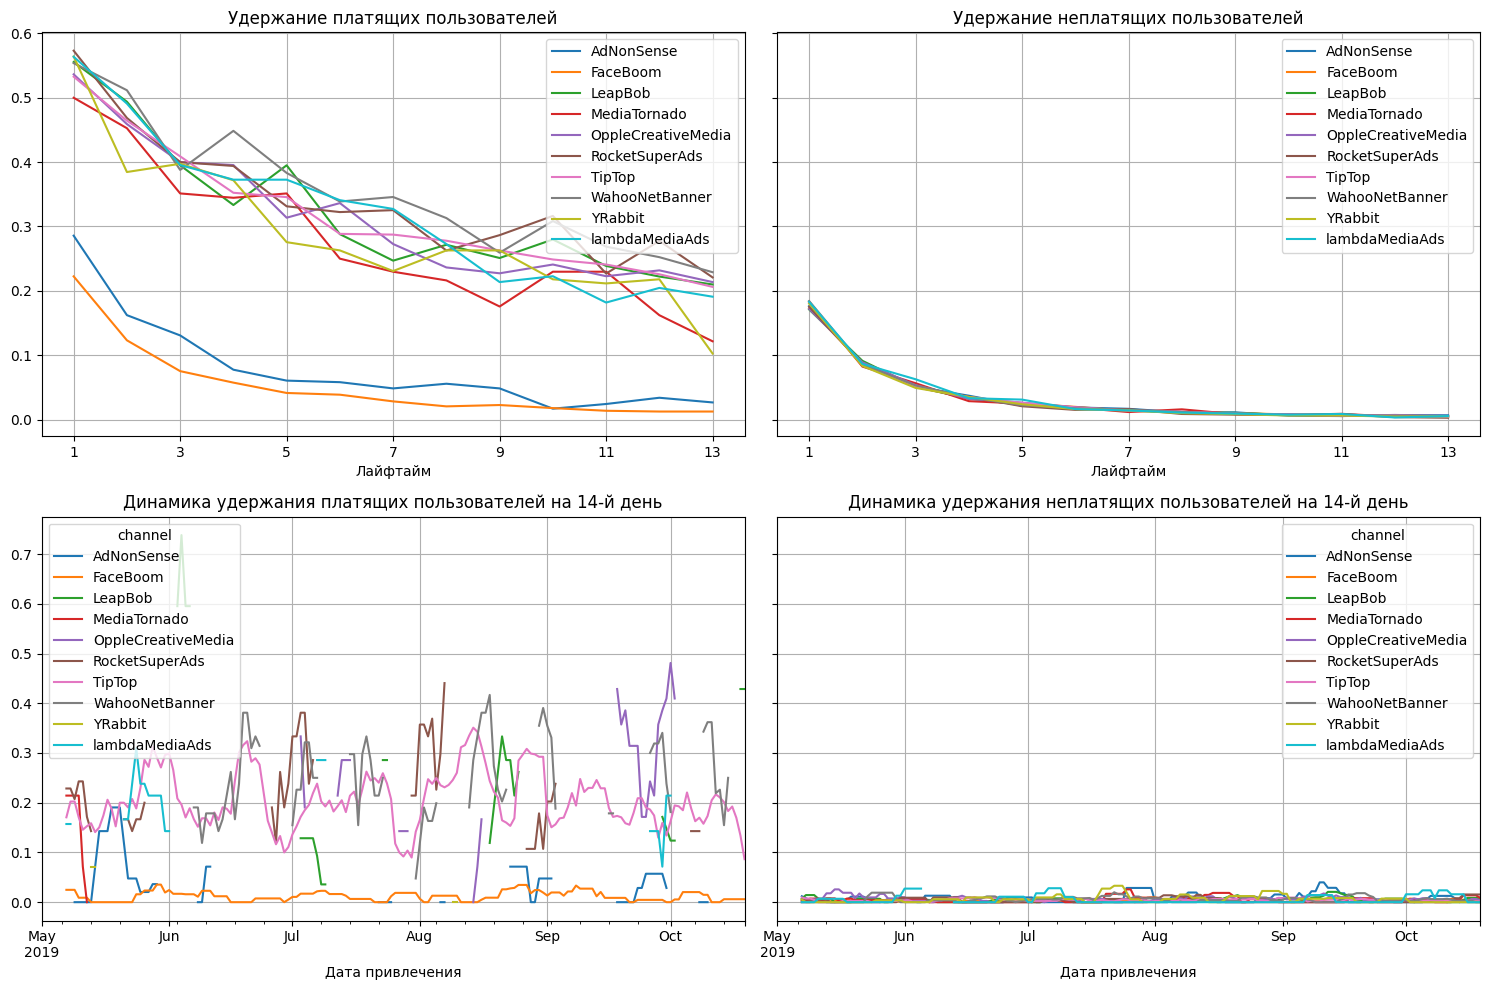

In [52]:
# посчитаем удержание для пользователей, пришедших через разные источники 
# и построим графики удержания пользователей и его изменения во времени

retention_raw, retention_grouped, retention_history = get_retention(
        users[users['channel']!='organic'], visits, observation_date, horizon_days, dimensions=['channel'])

plot_retention(retention_grouped, retention_history, horizon_days) 

Для всех каналов, кроме FaceBoom и AdNonSense, удержание платящих пользователей в среднем было выше 20% на 14-й день за весь период. FaceBoom был вторым по популярности каналом, но удержание платящих пользователей в среднем и на 14-ый день для него было около нулевым. Лучше всего в среднем удерживались платящие пользователи, привлеченные через RocketSuperAds и WahooNetBanner - они имеют наивысшие показатели на конец последнего лайфтайма. Примерно на том же уровне находится удержание пользователей, пришедших из TipTop, OppleCreativeMedia, LeapBob и lambdaMediaAds.

#### 5.4 Оценка окупаемости рекламы с разбивкой по устройствам

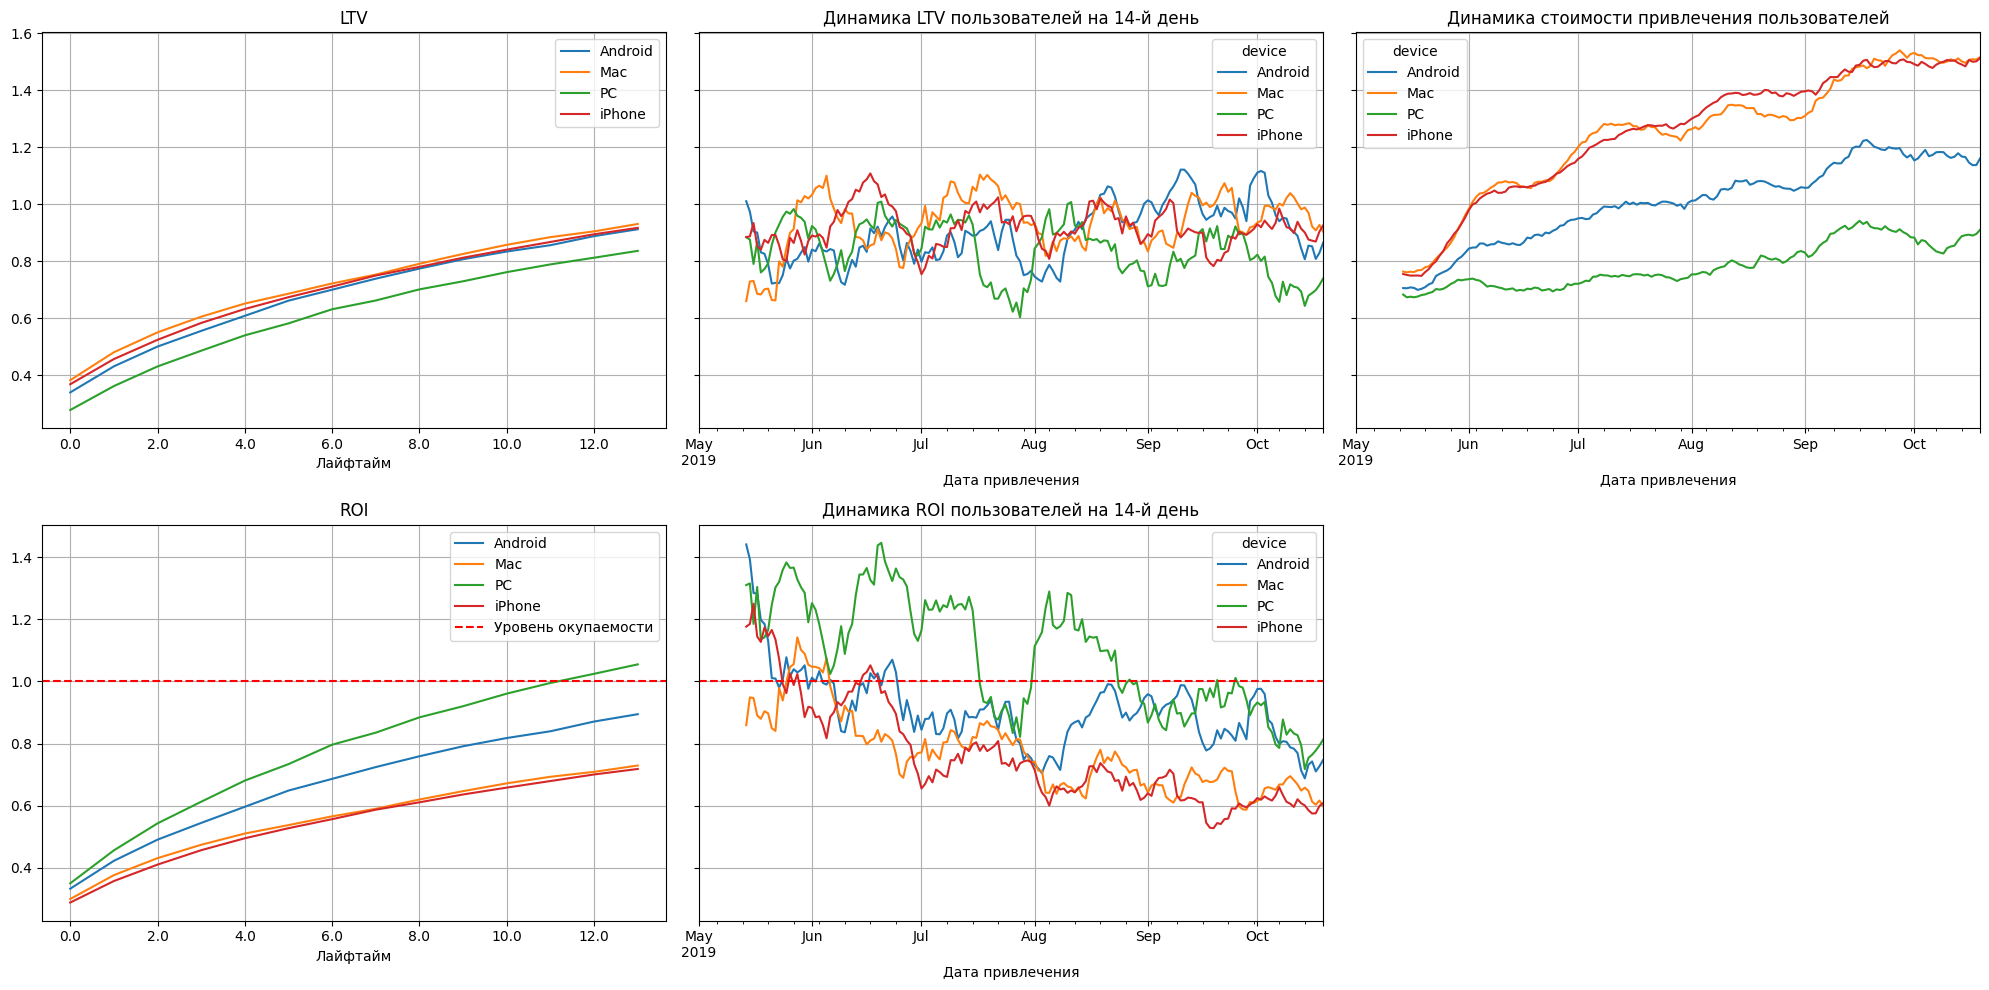

In [53]:
# проанализируем окупаемость рекламы с разбивкой по устройствам

# построим графики LTV и ROI, а также графики их динамики, установив параметром для деления на когорты 
# тип устройства пользователя 

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    users[users['channel']!='organic'], orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Как видно из первого графика, пользователи РС имеют LTV несколько ниже пользователей других устройств, LTV которых приблизительно одинаковый. Исследуя динамику LTV на 14 день, можно заметить, что на протяжении всего периода LTV для всех платформ стабильно держится в промежутке от 0,6 до 1,0. С другой стороны, САС рос на протяжении всего периода для всех платформ, при этом наблюдалось значительное различие между платформами. Наибольший САС был у пользоваетелей Мас и IPhone, наименьший - у пользователей РС, а САС пользователей Android находился посередине между этими двумя кривыми. 

В следствие вышесказанного, ROI падал на протяжении всего исследуемого периода для всех платформ, но большую часть времени оставался выше 1 для РС, и, начиная с июня, был стабильно меньше 1,для Mac, IPhone и Android. 
В среднем пользователь РС приносил прибыль после 11 дня использования приложения, пользователи других платформ были убыточными первые 14 дней.

#### 5.5 Оценка окупаемости рекламы с разбивкой по странам

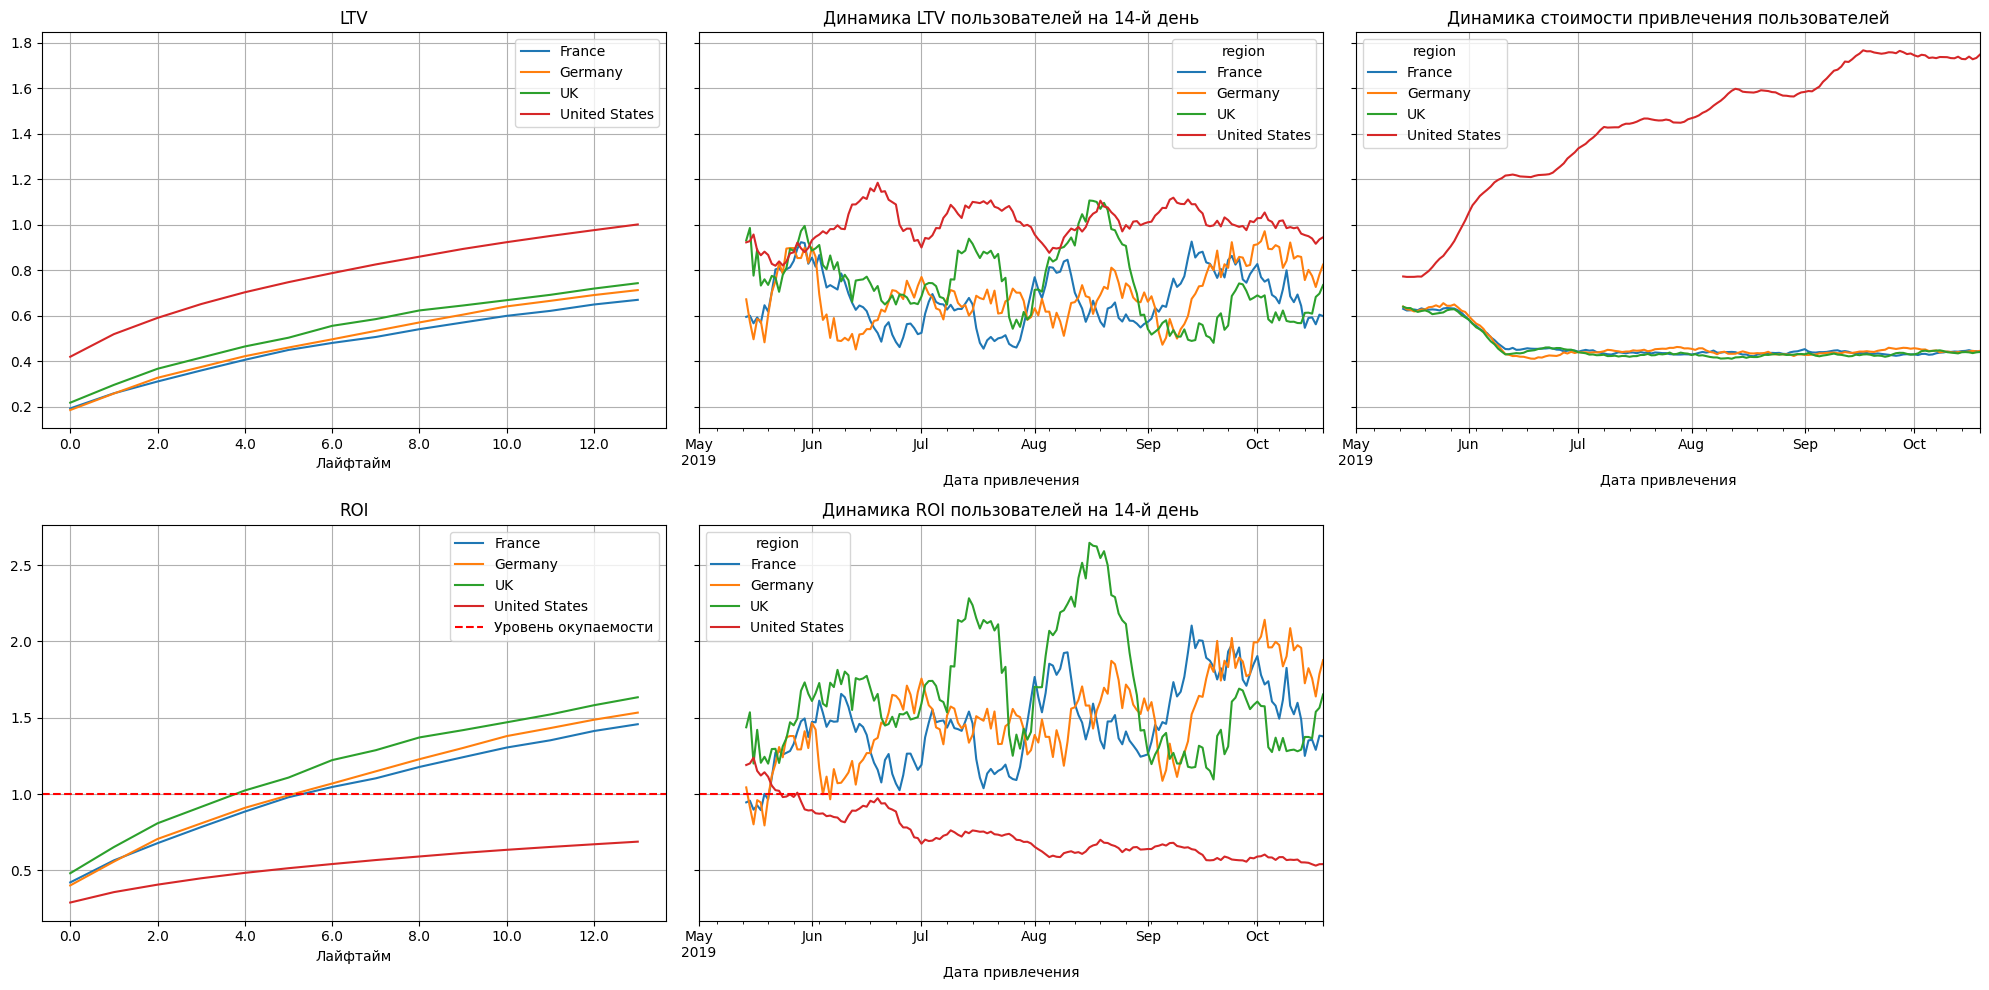

In [54]:
# проанализируем окупаемость рекламы с разбивкой по странам

# построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI, установив параметром для деления на когорты 
# регион пользователя

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    users[users['channel']!='organic'], orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Пользователи из США имеют LTV приблизительно на 0,2 больше, чем пользователи других стран для всех лайфтаймов. LTV других стран приблизительно одинаковый. График динамики этого показателя на 14 день показывает, что на протяжении всего периода стоимость привечения пользователей из США колеблется на уровне 1,0, а для других стран LTV колеблется на промежутке 0,5 - 1,0. Несмотря на это, САС пользователей из США стремительно растет и в октябре превышает САС других стран более чем в три раза, составляя приблизительно 1.7. САС для пользователей из других стран стабильно колебался вокруг 0,4. 

Соответственно, ROI пользователей из Америки падал на протяжении всего исследуемого периода и был ниже 1,0, начиная с середины мая. ROI пользователей из других стран был стабильно выше 1 и колебался вокруг 1,5. Самый большой ROI достигался для пользователей из UK в середине июля и середине августа и превышал значение 2,0. В среднем пользователи из Франции, Германии и Великобритании приносили прибыль, начиная с 5 дня использования приложения, а пользователи из США были убыточными первые 14 дней жизни.

#### 5.6 Оценка окупаемости рекламы с разбивкой по рекламным каналам

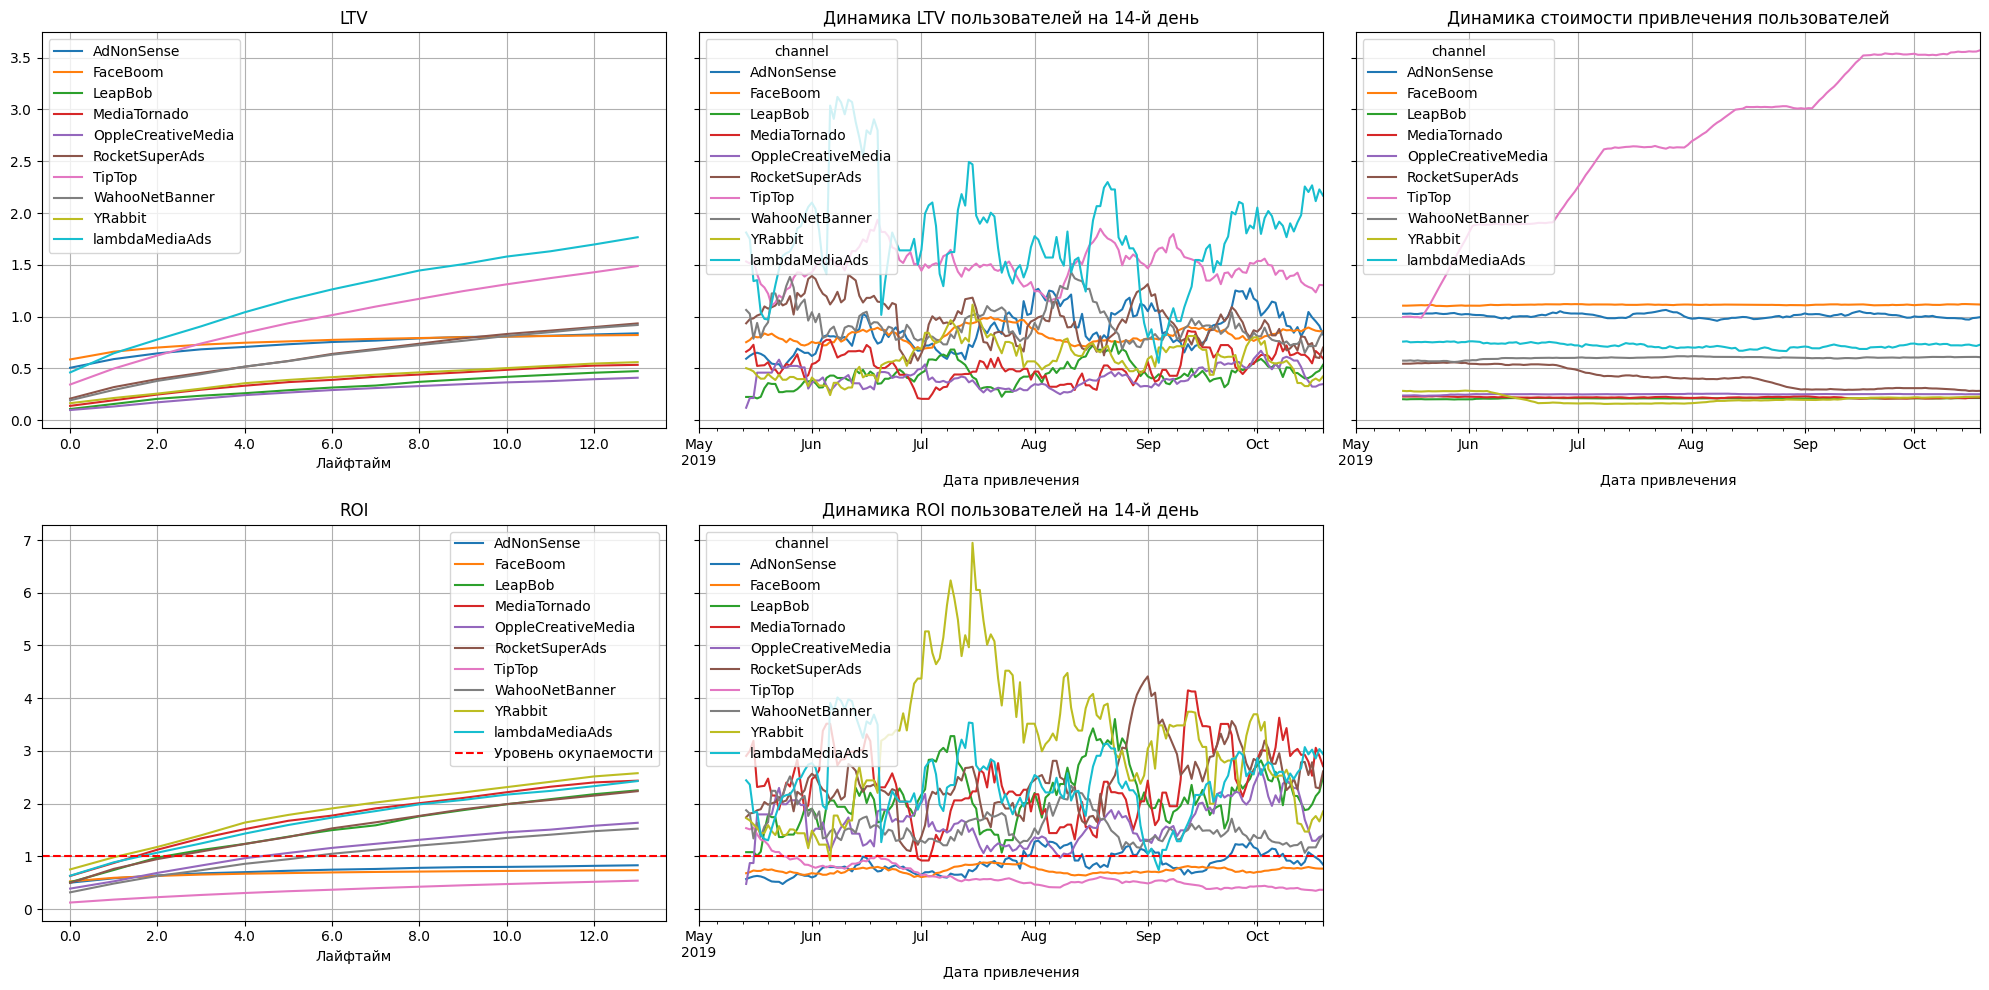

In [55]:
# проанализируем окупаемость рекламы с разбивкой по рекламным каналам

# построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI, установив параметром для деления на когорты 
# рекламный канал

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    users[users['channel']!='organic'], orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Наибольшее LTV соотвествует пользователям, привлеченным через источники lambdaMediaAds и TipTop. LTV пользователей, привлеченных через другие источники варьировался. Исследуя динамику LTV на 14 день, мы видим, что для всех рекламных каналов отсутствуют тренды возрастания или убывания. САС также стабильный для всех источников, кроме TipTop и RocketSuperAds - САС TipTop растет и превышает САС других каналов в конце периода более, чем в три раза, а САС RocketSuperAds наоборот падает. Наивысший САС достигается для пользователей источников TipTop, FaceBoom и AdNonSense.

ROI пользователей, привлеченных через источники TipTop, FaceBoom и AdNonSense ниже 1 на протяжении большей части исследуемого периода, что вызвано наивысшим САС для этих источников. У других каналов ROI стабильно выше 1 на протяжении всего периода. Наибольшего значения достигает ROI пользователей, привлеченных через YRabbit в июле, и составляет 7,0. В среднем пользователи, привлеченные TipTop, FaceBoom и AdNonSense, не окупаются на протяжении первых 14 дней, тогда как, пользователи пришедшие в приложение через рекламу на других каналах, начинают приносить прибыль приблизительно через 4 дня использования.

**Вывод:**

Начиная с конца июня реклама, направленная на привлечение пользователей, перестает окупаться из-за стабильного роста САС. При этом конверсия и удержание пользователей, а также LTV находятся на стабильном уровне, соответственно проблема не в качестве пользователей и не в их способности конвертироваться в покупателей.

Наименьшую окупаемость (ROI) имеют пользователи из Америки, пользователи, использующие IPhone и Мас, а также привлеченные через источники TipTop, FaceBoom и AdNonSense.

В основном, окупаемость находится на низком уровне из-за высокого САС. Это может быть вызвано высокой стоимостью рекламы для американского сегмента.

### 6. Общий вывод

***
В ходе исследования были проанализированы данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года развлекательным приложением Procrastinate Pro+. Несмотря на большие вложения в рекламу, последние несколько месяцев компания терпела убытки. Задачей исследования было выяснить причины неокупаемости рекламы приложения, а также - предложить пути решения данной проблемы.

***
На первом этапе проекта (предобработка данных) были выявлены две основные проблемы:
- оформление исходных таблиц не соответсвует правилам хорошего стиля;
- столбцы с информацией о времени содержат данные в неподходящем для дальнейшей работы формате *object*.

Пропусков и дубликатов в исходных датафреймах обнаружено не было. Таким образом, в ходе предобработки данных были произведены следующие преобразования: наименования столбцов в исходных датафреймах были приведены к правилам хорошего стиля; столбцы с информацией о дате и времени были приведены к формату *datetime*.

***
По результатам исследовательского анализа, было установлено, что большая часть пользователей - 100 тысяч человек, сосредоточены в США. Там же проживает наибольшее количество платящих пользователей. Логично, что, при этом, наиболее популярным устройством для пользования приложением является IPhone. 

Большая часть пользователей начинают свое знакомство с Procrastinate Pro+ самостоятельно - более 56 тысяч человек было привлечено не через рекламу. Наиболее результативными рекламными сервисами являются FaceBoom и TipTop - они принесли приложению наибольшее колиичество пользователей и покупателей соответственно.

Однако стоимость привлечения одного пользователя через источники TipTop и FaceBoom в несколько раз дороже, чем стоимость рекламы в других источниках. Суммарно, около 80% рекламного бюджета уходит на оплату привлечения через эти каналы. Более того, затраты на размещение рекламы через эти сервисы, интенсивно росли на протяжении всего исследуемого периода.

Маркетинговый анализ деятельности компании показал, что показатель окупаемости рекламы - ROI стабильно уменьшался и был меньше единицы , начиная с конца июня. Чтобы понять причины этого явления, мы исследовали конверсию, удержание, а также LTV и САС, разбивая их по платформам, странам и источникам рекламы.

Мы выяснили, что конверсия и LTV находились на стабильном уровне на протяжении всего периода, а удержание платящих пользователей было значительно выше, чем у неплатящих вне зависимости от разбивки по странам, источникам и платформам. Однако, совершив разбивку по источникам, мы выяснили что удержание платящих пользователей на 14-й день для FaceBoom был почти нулевой, хоть и все еще выше удержания неплатящих пользователей. Этот факт особенно важен, учитывая то, что это самая популярная рекламная платформа. Кроме этого САС стабильно увеличивался на протяжении всего периода. Мы выяснили, что повышение САС было вызвано определенными группами пользователей: пользователями из Америки, использующими американские платформы IPhone и Мас, а также пользователями привлеченными через источники TipTop, FaceBoom и AdNonSense. Для других групп САС был стабильным, а ROI был всегда выше 1.  

Таким образом, можно сделать вывод, что низкая окупаемость рекламы связана с высокой стоимостью рекламы для американского сегмента, а так же низкой эффективностью FaceBoom как основного рекламного источника притока пользователей.

Чтобы сделать рекламную кампанию более эффективной необходимо искать пути понижения стоимости на американском сегменте рынка. Например, можно искать альтернативные источники рекламы, либо искать конкретный подсегмент американского рынка с меньшим САС (например, только пользователей PC). Важно так же рассмотреть варианты прекращения использования FaceBoom и TipTop в качестве основных источников привлечения пользователей из-за очень низкого удержания платящих пользователей, высокой стоимости рекламы и низкой рентабельности. Можно обратить внимание на другие каналы, с более низким САС, которые привлекали пользователей с хорошей конверсией и удержанием. Например, RocketSuperAds, WahooNetBanner и lambdaMediaAds.

Альтернативно, можно смещать фокус на европейский рынок, где ROI стабильно выше 1. 